In [6]:
import gurobipy as gp
from gurobipy import GRB
import math

# Parameters
m = 6  # number of disks
r = 1  # radius of each disk

# Create model
model = gp.Model("disk_packing")
model.setParam("NonConvex", 2)  # Enable non-convex quadratic constraints

# Variables: center coordinates for each disk
x = model.addVars(m, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="x")
y = model.addVars(m, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="y")

# Variable: half-size R of the square (to be minimized)
R = model.addVar(lb=0, name="R")

# Constraint: all disks must be within the square
for i in range(m):
    model.addConstr(x[i] <= R - r)
    model.addConstr(x[i] >= -R + r)
    model.addConstr(y[i] <= R - r)
    model.addConstr(y[i] >= -R + r)

# Constraint: disks must not overlap
for i in range(m):
    for j in range(i+1, m):
        dx = x[i] - x[j]
        dy = y[i] - y[j]
        model.addQConstr(dx*dx + dy*dy >= (2*r)**2)

# Objective: minimize the square's half-width R
model.setObjective(R, GRB.MINIMIZE)

# Solve
model.optimize()

# Output results
if model.Status == GRB.OPTIMAL:
    print(f"Optimal half-size R: {R.X:.4f}")
    for i in range(m):
        print(f"Disk {i+1}: center = ({x[i].X:.3f}, {y[i].X:.3f})")

Set parameter NonConvex to value 2
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (mac64[arm] - Darwin 24.3.0 24D70)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 24 rows, 13 columns and 48 nonzeros
Model fingerprint: 0xaed838af
Model has 15 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [4e+00, 4e+00]

Continuous model is non-convex -- solving as a MIP

Presolve time: 0.00s
Presolved: 111 rows, 56 columns, 282 nonzeros
Presolved model has 42 bilinear constraint(s)
         in product terms.
         Presolve was not able to compute smaller bounds for these variables.
         Consider bounding these variables or reformulating the model.

Variable types: 56 continuous, 0 integer (0 binary)

Root relaxation: objective 1.000000e

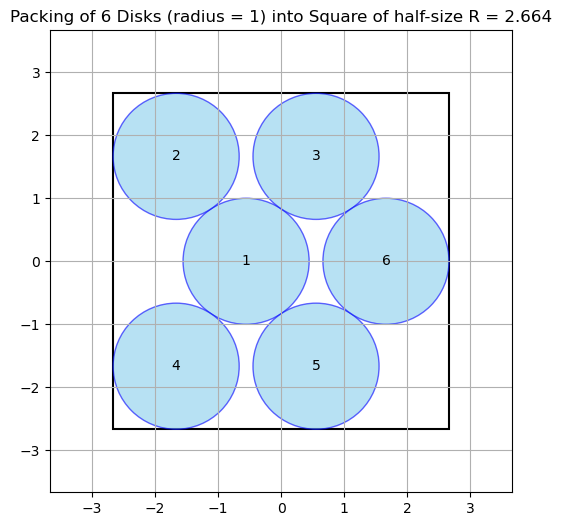

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set up plot
fig, ax = plt.subplots(figsize=(6,6))
R_val = R.X

# Draw the square box
square = patches.Rectangle(
    (-R_val, -R_val), 2*R_val, 2*R_val,
    linewidth=1.5, edgecolor='black', facecolor='none'
)
ax.add_patch(square)

# Draw each disk
for i in range(m):
    xi = x[i].X
    yi = y[i].X
    circle = patches.Circle((xi, yi), radius=r, edgecolor='blue', facecolor='skyblue', alpha=0.6)
    ax.add_patch(circle)
    ax.text(xi, yi, str(i+1), ha='center', va='center', fontsize=10)

# Plot settings
ax.set_xlim(-R_val - 1, R_val + 1)
ax.set_ylim(-R_val - 1, R_val + 1)
ax.set_aspect('equal')
ax.set_title(f"Packing of {m} Disks (radius = {r}) into Square of half-size R = {R_val:.3f}")
plt.grid(True)
plt.show()